<a href="https://colab.research.google.com/github/PiyushMi12/Diwali_sales_EDA/blob/main/SALES_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statements**
1. Which gender has the most sales?
2. Which age-grp has the most sales?
3. Which occupation buys the most ?
4. Which state has the most buys?
5. Which gender in the age grps has the most number of sales?
6. Does married or unmarried people buys the most?
7. Which zone has highest sales?






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#We read the data first
df=pd.read_csv("sample_data/Diwali Sales Data.csv",encoding="unicode_escape")
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df[df["Amount"].isnull()]
#We now drop the nan values
all_data=df.drop(columns=["Status","unnamed1"])
all_data=all_data.dropna()

In [4]:
null_values= all_data.isnull().sum()
null_values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [5]:
all_data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
#we will drop the duplicates
all_data[all_data.duplicated(subset="User_ID")]#to see the duplicated column according to product id
all_data.drop_duplicates(subset="User_ID",inplace=True)
all_data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00
11,1000214,Kargatis,P00119142,F,18-25,20,0,Andhra Pradesh,Southern,Retail,Auto,2,23752.00


**Now we perform Data Analysis after cleainng the data**

In [7]:
#checking all the columns
all_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
all_data.describe()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3752 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3752 non-null   int64  
 1   Cust_name         3752 non-null   object 
 2   Product_ID        3752 non-null   object 
 3   Gender            3752 non-null   object 
 4   Age Group         3752 non-null   object 
 5   Age               3752 non-null   int64  
 6   Marital_Status    3752 non-null   int64  
 7   State             3752 non-null   object 
 8   Zone              3752 non-null   object 
 9   Occupation        3752 non-null   object 
 10  Product_Category  3752 non-null   object 
 11  Orders            3752 non-null   int64  
 12  Amount            3752 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 410.4+ KB


In [9]:
#Creating a Married column
all_data["MARITAL_STATUS"]=all_data.Marital_Status.replace({0:"Unmarrried",1:"Married"})

In [54]:
all_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,3.752000e+03,3752.000000,3752.000000,3752.000000,3752.000000
mean,1.003033e+06,36.117537,0.417377,2.466418,12614.668158
std,1.749201e+03,13.924207,0.493192,1.115052,5506.632634
min,1.000001e+06,12.000000,0.000000,1.000000,567.000000
25%,1.001501e+06,27.000000,0.000000,1.000000,8007.250000
50%,1.003056e+06,33.000000,0.000000,2.000000,12274.500000
75%,1.004527e+06,44.000000,1.000000,3.000000,16681.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**Descriptive Statistics:**

**1. What is the distribution of 'Age' and 'Amount' in the dataset?**

**2. What are the summary statistics (mean, median, min, max) for 'Orders'?**

In [14]:
print(sales)
grouped_data=all_data.groupby(["Age Group"])
A = grouped_data.get_group("0-17")
A["Amount"].sum()

Age Group
0-17      1527538.00
18-25     8090791.00
26-35    17759769.44
36-45     9712892.49
46-50     4063773.00
51-55     3826568.00
55+       2348903.00
Name: Amount, dtype: float64


1527538.0

In [26]:
all_data["Age Group"].value_counts()
age_grp=[age_grp for age_grp ,df in all_data.groupby(["Age Group"])]
sales=all_data.groupby(["Age Group"])["Amount"].sum()

<ipython-input-26-8d916a5a3e51>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  age_grp=[age_grp for age_grp ,df in all_data.groupby(["Age Group"])]


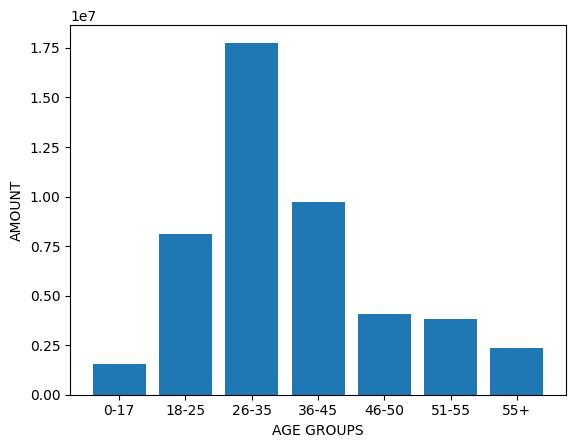

In [27]:
plt.bar(age_grp,sales)
plt.xlabel("AGE GROUPS")
plt.ylabel("AMOUNT")
plt.show()

**26-35 age grps people bought the most item**


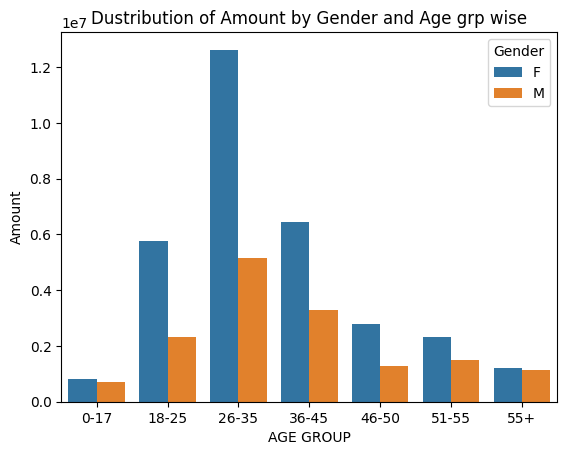

In [33]:
gender=all_data.groupby(["Gender","Age Group"])["Amount"].sum().reset_index()
sns.barplot(x="Age Group",y="Amount",hue="Gender",data=gender)
plt.title("Dustribution of Amount by Gender and Age grp wise")
plt.xlabel("AGE GROUP")
plt.ylabel("Amount")
plt.show()

**Female of all age group bought different product bt females of 26-35 age grp have bought the most**

In [107]:
all_data.groupby("Zone")["Amount"].sum()

Index(['Central', 'Eastern', 'Northern', 'Southern', 'Western'], dtype='object', name='Zone')

<class 'pandas.core.series.Series'>


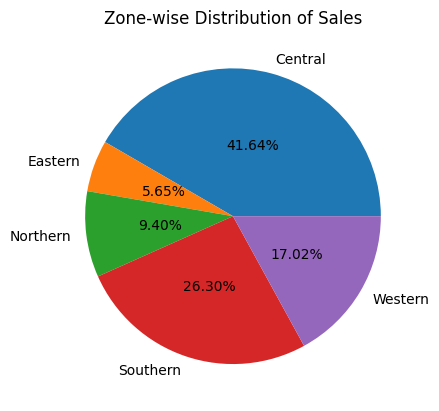

In [115]:
zone_wise=all_data.groupby("Zone")["Amount"].sum()
print(type(zone_wise))
zone_names=zone_wise.index
plt.title("Zone-wise Distribution of Sales")
plt.pie(zone_wise,labels=zone_names,pctdistance=0.5,autopct="%1.2f%%")
plt.show()

**Western Zone has the maximum number of sales**

MARITAL_STATUS
Married       19716677.99
Unmarrried    27613556.94
Name: Amount, dtype: float64


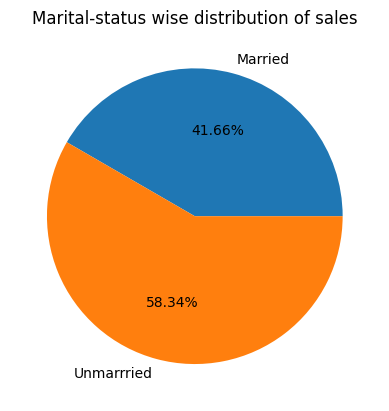

In [111]:
print(all_data.groupby("MARITAL_STATUS")["Amount"].sum())
plt.pie(all_data.groupby("MARITAL_STATUS")["Amount"].sum(),labels=all_data.groupby("MARITAL_STATUS")["Amount"].sum().index,autopct="%1.2f%%")
plt.title("Marital-status wise distribution of sales")
plt.show()

  MARITAL_STATUS Gender       Amount
0        Married      F  13191811.99
1        Married      M   6524866.00
2     Unmarrried      F  18775323.94
3     Unmarrried      M   8838233.00


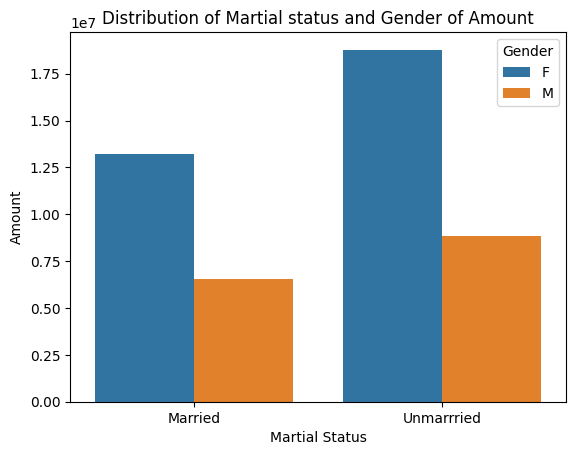

In [80]:
martial=all_data.groupby(["MARITAL_STATUS","Gender"])["Amount"].sum().reset_index()
print(martial)
sns.barplot(x="MARITAL_STATUS",y="Amount",hue="Gender",data=martial)
plt.title("Distribution of Martial status and Gender of Amount")
plt.xlabel("Martial Status")
plt.ylabel("Amount")
plt.show()

**Unmarried Woman buy more product**

Gender
F    31967135.93
M    15363099.00
Name: Amount, dtype: float64


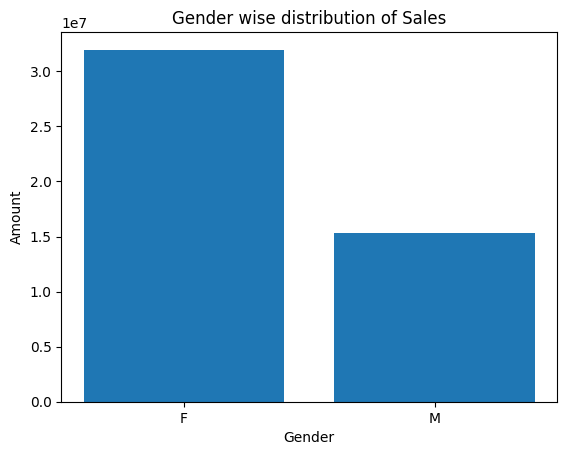

In [81]:
plt.bar(all_data["Gender"].unique(),all_data.groupby("Gender")["Amount"].sum())
print(all_data.groupby("Gender")["Amount"].sum())
plt.title("Gender wise distribution of Sales")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

**Female has more purchasing power**

State
Andhra Pradesh    3898159.99
Bihar             1729961.00
Delhi             6065212.95
Gujarat           1679348.00
Haryana           1774454.00
Name: Amount, dtype: float64


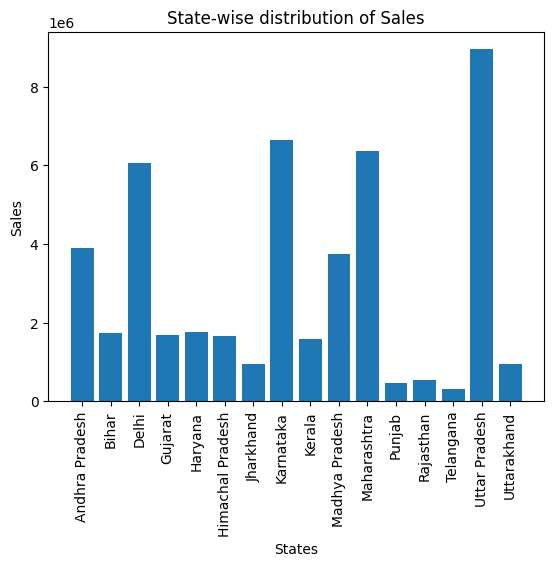

In [85]:
#State wise distribution
cities=[city for city ,df in all_data.groupby("State")]
plt.bar(cities,all_data.groupby("State")["Amount"].sum())
print(all_data.groupby("State")["Amount"].sum()[:5])
plt.title("State-wise distribution of Sales")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Sales")
plt.show()

**Uttar Pradesh has the highest number of sales**

Occupation
Agriculture    1032507.00
Automobile     2480575.00
Aviation       5606616.00
Banking        4522586.95
Chemical       2680666.00
Name: Amount, dtype: float64


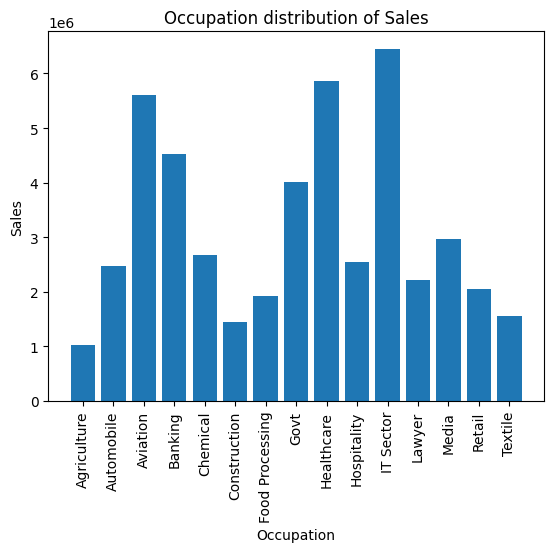

In [88]:
works = [work for work ,df in all_data.groupby("Occupation")]
print(all_data.groupby("Occupation")["Amount"].sum()[:5])
plt.bar(works,all_data.groupby("Occupation")["Amount"].sum())
plt.xticks(rotation=90)
plt.title("Occupation distribution of Sales")
plt.xlabel("Occupation")
plt.ylabel("Sales")
plt.show()

**IT Sector has caused the most sales**